In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Yolo_dataset

/content/drive/MyDrive/Yolo_dataset


In [3]:
%ls

data.yaml           README.roboflow.txt  test/   Untitled0.ipynb  wandb/
README.dataset.txt  runs/                train/  valid/           yolo11n.pt


In [4]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.20 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/112.6 GB disk)


In [5]:
from ultralytics import YOLO

# Load a model
#model = YOLO('yolo11n.yaml')  # build a new model from scratch
model = YOLO('yolo11n.pt')  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data='/content/drive/MyDrive/Yolo_dataset/data.yaml', epochs=70)  # train the model
results = model.val()  # evaluate model performance on the validation set
results = model('/content/drive/MyDrive/Yolo_dataset/test/images/A22_jpg.rf.66ed75c9e281ec8b549997783c4c216d.jpg')  # predict on an image
results = model.export(format='onnx')  # export the model to ONNX format

Ultralytics 8.3.20 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/Yolo_dataset/data.yaml, epochs=70, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train15, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_

100%|██████████| 755k/755k [00:00<00:00, 19.4MB/s]


Overriding model.yaml nc=80 with nc=26

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytic

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Yolo_dataset/train/labels.cache... 504 images, 0 backgrounds, 0 corrupt: 100%|██████████| 504/504 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/Yolo_dataset/valid/labels.cache... 144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 144/144 [00:00<?, ?it/s]


Plotting labels to runs/detect/train15/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000333, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train15
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70      2.42G     0.8697       4.35      1.319         17        640: 100%|██████████| 32/32 [02:52<00:00,  5.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.18s/it]

                   all        144        144          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      2.44G     0.6757      4.043      1.159         17        640: 100%|██████████| 32/32 [00:41<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.06s/it]

                   all        144        144     0.0508      0.703     0.0966     0.0904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70      2.44G     0.6523      3.764      1.144         29        640: 100%|██████████| 32/32 [00:46<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

                   all        144        144     0.0326       0.95      0.184      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70      2.44G      0.706      3.577       1.17         21        640: 100%|██████████| 32/32 [00:44<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]

                   all        144        144      0.474      0.219      0.279       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70      2.44G     0.7255      3.354      1.188         22        640: 100%|██████████| 32/32 [00:43<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]

                   all        144        144      0.382      0.435      0.384      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70      2.44G     0.7153      3.137       1.17         16        640: 100%|██████████| 32/32 [00:43<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]

                   all        144        144      0.422      0.504      0.435      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      2.45G     0.7244      2.942      1.179         13        640: 100%|██████████| 32/32 [00:43<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.21s/it]


                   all        144        144      0.532      0.458      0.483      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70      2.45G      0.699      2.738      1.166         12        640: 100%|██████████| 32/32 [00:38<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

                   all        144        144      0.654       0.47      0.566      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      2.45G     0.6377      2.513      1.115         14        640: 100%|██████████| 32/32 [00:44<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.17s/it]

                   all        144        144      0.438      0.638      0.615      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      2.44G     0.6523      2.368      1.115         19        640: 100%|██████████| 32/32 [00:46<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.33s/it]

                   all        144        144      0.601      0.647       0.68      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70      2.45G     0.6459      2.322      1.122         12        640: 100%|██████████| 32/32 [00:44<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.00s/it]

                   all        144        144      0.512      0.719      0.678      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70      2.44G     0.6208      2.168      1.084         20        640: 100%|██████████| 32/32 [00:43<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.33it/s]

                   all        144        144      0.591      0.707      0.728      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70      2.44G     0.6283      2.127      1.111         17        640: 100%|██████████| 32/32 [00:52<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.07it/s]

                   all        144        144      0.716      0.683      0.775      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      2.44G     0.5953      1.979      1.072         17        640: 100%|██████████| 32/32 [00:47<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.03it/s]

                   all        144        144      0.685      0.737      0.807      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70      2.45G     0.5972      1.961       1.08         11        640: 100%|██████████| 32/32 [00:46<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]


                   all        144        144      0.592      0.744      0.767      0.709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70      2.45G     0.5747      1.873      1.053         14        640: 100%|██████████| 32/32 [00:47<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.03s/it]

                   all        144        144      0.728      0.748      0.855      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70      2.44G     0.5803      1.794      1.071         15        640: 100%|██████████| 32/32 [00:46<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]

                   all        144        144      0.669      0.798      0.846      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70      2.44G     0.5443      1.663      1.028         22        640: 100%|██████████| 32/32 [00:52<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]

                   all        144        144      0.769      0.766      0.847      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70      2.44G     0.5761      1.707      1.064         27        640: 100%|██████████| 32/32 [00:49<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

                   all        144        144      0.794      0.739      0.848      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70      2.44G     0.5354      1.583      1.042         21        640: 100%|██████████| 32/32 [00:47<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

                   all        144        144      0.691      0.798      0.851      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70      2.45G     0.5463      1.539      1.039         16        640: 100%|██████████| 32/32 [00:47<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

                   all        144        144      0.734      0.795      0.847      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70      2.44G     0.5096      1.453      1.016         23        640: 100%|██████████| 32/32 [00:45<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.06s/it]

                   all        144        144      0.776      0.786      0.886      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70      2.45G     0.5318       1.47      1.032         14        640: 100%|██████████| 32/32 [00:41<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]

                   all        144        144      0.853      0.772      0.893      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70      2.44G      0.514      1.444      1.022         17        640: 100%|██████████| 32/32 [00:45<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]

                   all        144        144      0.776      0.826       0.89      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70      2.44G     0.5494      1.427      1.045         20        640: 100%|██████████| 32/32 [00:39<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.08it/s]

                   all        144        144      0.821       0.78      0.886       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70      2.44G      0.549      1.438      1.043         17        640: 100%|██████████| 32/32 [00:38<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

                   all        144        144      0.826      0.788      0.903      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70      2.44G     0.4883      1.349      1.008         18        640: 100%|██████████| 32/32 [00:41<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.16s/it]

                   all        144        144      0.808      0.816      0.893      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70      2.44G     0.5148      1.347      1.024         14        640: 100%|██████████| 32/32 [00:44<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.07s/it]


                   all        144        144      0.855      0.846      0.926      0.866

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70      2.44G     0.5299      1.296      1.027         23        640: 100%|██████████| 32/32 [00:46<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.32s/it]


                   all        144        144      0.869      0.832      0.928       0.87

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70      2.44G     0.5323      1.304      1.025         14        640: 100%|██████████| 32/32 [00:45<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        144        144      0.879      0.852      0.933      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70      2.45G     0.4784      1.198     0.9874         11        640: 100%|██████████| 32/32 [00:48<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        144        144       0.87       0.86      0.933      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70      2.45G     0.4941       1.23      1.006         13        640: 100%|██████████| 32/32 [00:47<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]

                   all        144        144       0.88      0.864      0.935      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/70      2.44G     0.4812      1.232      1.005         15        640: 100%|██████████| 32/32 [00:48<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        144        144      0.915      0.839      0.935      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/70      2.44G     0.4795      1.131     0.9929         17        640: 100%|██████████| 32/32 [00:45<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.06it/s]

                   all        144        144      0.911      0.853      0.942       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/70      2.44G     0.4944      1.146      1.016         24        640: 100%|██████████| 32/32 [00:45<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.07it/s]

                   all        144        144      0.844      0.858      0.933      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/70      2.44G     0.4818      1.138      1.004         20        640: 100%|██████████| 32/32 [00:42<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]

                   all        144        144      0.866      0.848      0.936      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/70      2.44G     0.4731      1.124     0.9935         19        640: 100%|██████████| 32/32 [00:47<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.33it/s]

                   all        144        144      0.838      0.832      0.926      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/70      2.44G     0.4373      1.041     0.9856         18        640: 100%|██████████| 32/32 [00:40<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.16s/it]

                   all        144        144      0.907      0.844      0.944      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/70      2.44G      0.446      1.071     0.9846         19        640: 100%|██████████| 32/32 [00:39<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        144        144      0.892       0.82       0.93       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/70      2.44G     0.4734      1.044      1.004         19        640: 100%|██████████| 32/32 [00:43<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.14s/it]

                   all        144        144      0.841      0.873      0.926      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/70      2.44G      0.437     0.9918     0.9671         15        640: 100%|██████████| 32/32 [00:42<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.31it/s]

                   all        144        144       0.83      0.869      0.928      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/70      2.45G      0.429     0.9783     0.9737         13        640: 100%|██████████| 32/32 [00:44<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        144        144      0.897      0.829      0.934      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/70      2.44G     0.4505      1.007     0.9922         21        640: 100%|██████████| 32/32 [00:48<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]

                   all        144        144      0.912      0.862      0.945      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/70      2.44G     0.4405     0.9937     0.9752         17        640: 100%|██████████| 32/32 [00:46<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.69it/s]

                   all        144        144      0.922      0.849      0.948      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/70      2.44G      0.436     0.9781     0.9776         18        640: 100%|██████████| 32/32 [00:41<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.17s/it]


                   all        144        144      0.931      0.874      0.947      0.901

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/70      2.44G      0.439     0.9443     0.9764         25        640: 100%|██████████| 32/32 [00:41<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

                   all        144        144      0.851      0.926      0.953      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/70      2.44G     0.4174       0.93      0.958         16        640: 100%|██████████| 32/32 [00:45<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.02it/s]

                   all        144        144      0.925      0.877      0.945      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/70      2.44G     0.4255     0.9478     0.9793         19        640: 100%|██████████| 32/32 [00:43<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.05s/it]

                   all        144        144      0.874      0.883      0.942      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/70      2.44G      0.419     0.9334     0.9693         19        640: 100%|██████████| 32/32 [00:43<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

                   all        144        144      0.877      0.877       0.95      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/70      2.44G     0.4188       0.93     0.9714         22        640: 100%|██████████| 32/32 [00:45<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]

                   all        144        144      0.864      0.855      0.937      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/70      2.44G     0.4096     0.9224     0.9674         21        640: 100%|██████████| 32/32 [00:43<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.17s/it]

                   all        144        144       0.89      0.839      0.941      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/70      2.44G     0.4332     0.9347     0.9748         20        640: 100%|██████████| 32/32 [00:42<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.09it/s]

                   all        144        144      0.898      0.876      0.946      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/70      2.44G     0.4246     0.8818     0.9687         14        640: 100%|██████████| 32/32 [00:44<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]

                   all        144        144      0.916      0.875      0.955        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/70      2.44G     0.4383      0.858     0.9786         24        640: 100%|██████████| 32/32 [00:37<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.15it/s]

                   all        144        144      0.893      0.882      0.947      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/70      2.45G     0.4099     0.8504     0.9637         13        640: 100%|██████████| 32/32 [00:37<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.07s/it]

                   all        144        144      0.911      0.863       0.95      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/70      2.44G     0.4153     0.8465     0.9547         21        640: 100%|██████████| 32/32 [00:38<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]

                   all        144        144      0.931      0.836      0.947      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/70      2.44G     0.3865     0.8162      0.941         17        640: 100%|██████████| 32/32 [00:38<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.17s/it]

                   all        144        144      0.912      0.864      0.942       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/70      2.44G     0.4024      0.822     0.9497         21        640: 100%|██████████| 32/32 [00:40<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.50it/s]

                   all        144        144      0.905      0.862      0.944      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/70      2.45G     0.4009     0.8178     0.9596         13        640: 100%|██████████| 32/32 [00:44<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.15it/s]

                   all        144        144      0.925      0.856      0.939      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/70      2.44G      0.396     0.8181     0.9591         15        640: 100%|██████████| 32/32 [00:39<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        144        144      0.902      0.883      0.943      0.896


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/70      2.45G     0.2471     0.8254     0.8456          8        640: 100%|██████████| 32/32 [00:52<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.21s/it]


                   all        144        144      0.914      0.861      0.938      0.888

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/70      2.45G     0.2344     0.7971      0.835          8        640: 100%|██████████| 32/32 [00:43<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]

                   all        144        144      0.916       0.87      0.929      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/70      2.45G     0.2378     0.7517     0.8166          8        640: 100%|██████████| 32/32 [00:44<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]

                   all        144        144       0.94      0.821      0.935      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/70      2.45G     0.2359     0.7551     0.8374          8        640: 100%|██████████| 32/32 [00:45<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]

                   all        144        144      0.938      0.854      0.946      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/70      2.45G     0.2207     0.7171     0.8289          8        640: 100%|██████████| 32/32 [00:44<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]

                   all        144        144      0.928      0.844       0.94      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/70      2.45G     0.2273     0.7302     0.8315          8        640: 100%|██████████| 32/32 [00:41<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]

                   all        144        144      0.906      0.866       0.94       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/70      2.45G     0.2173      0.712     0.8339          8        640: 100%|██████████| 32/32 [00:39<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.31s/it]


                   all        144        144      0.915      0.886      0.946      0.896

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/70      2.44G     0.2228     0.7143     0.8309          8        640: 100%|██████████| 32/32 [00:43<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]

                   all        144        144      0.917      0.883      0.947      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/70      2.44G     0.2191     0.7058     0.8236          8        640: 100%|██████████| 32/32 [00:47<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]

                   all        144        144      0.911      0.878      0.948        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/70      2.44G     0.2168     0.7075     0.8207          8        640: 100%|██████████| 32/32 [00:45<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.33it/s]

                   all        144        144      0.922      0.871       0.95      0.906



70 epochs completed in 1.046 hours.
Optimizer stripped from runs/detect/train15/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train15/weights/best.pt, 5.5MB

Validating runs/detect/train15/weights/best.pt...
Ultralytics 8.3.20 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,587,222 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.26s/it]


                   all        144        144       0.91      0.863       0.95      0.907
                     A          5          5          1      0.918      0.995      0.995
                     B          9          9          1       0.61      0.916      0.861
                     C          3          3      0.834      0.667       0.83      0.731
                     D          6          6      0.979          1      0.995      0.976
                     E          4          4      0.958          1      0.995      0.995
                     F          8          8      0.959      0.875      0.893      0.877
                     G          5          5      0.946          1      0.995      0.968
                     H          9          9      0.989          1      0.995      0.947
                     I          2          2      0.896        0.5      0.595      0.595
                     J          8          8      0.982          1      0.995      0.734
                     

lr/pg0,▅█████▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁
lr/pg1,▃▅███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▅▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▁▁▁
lr/pg2,█████▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▂▂▂▂▂▂▁▁▁
metrics/mAP50(B),▁▂▃▄▄▅▆▆▇▇▇▇▇███████████████████████████
metrics/mAP50-95(B),▁▂▄▄▄▅▇▇▇▇▇▇▇███████████████████████████
metrics/precision(B),▁▁▁▅▄▆▅▅▆▆▆▆▇▇▆▇▇▇▇█▇▇███▇██▇███████████
metrics/recall(B),▁▆█▄▄▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇██▇▇▇▇▇▇▇█▇▇▇▇█▇
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▇████▇▇▇▆▆▆▆▅▆▅▅▆▆▅▅▅▅▅▅▄▄▄▄▄▄▄▄▄▃▄▁▁▁▁▁


Ultralytics 8.3.20 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,587,222 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/drive/MyDrive/Yolo_dataset/valid/labels.cache... 144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 144/144 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.28s/it]


                   all        144        144      0.911      0.862       0.95      0.906
                     A          5          5          1      0.918      0.995      0.995
                     B          9          9          1      0.608      0.916      0.861
                     C          3          3      0.837      0.667       0.83      0.731
                     D          6          6       0.98          1      0.995      0.945
                     E          4          4      0.959          1      0.995      0.995
                     F          8          8      0.959      0.875      0.893      0.877
                     G          5          5      0.946          1      0.995      0.968
                     H          9          9      0.989          1      0.995      0.947
                     I          2          2      0.897        0.5      0.595      0.595
                     J          8          8      0.982          1      0.995      0.734
                     

Loading /content/drive/MyDrive/Yolo_dataset/runs/detect/train15/weights/best.onnx for ONNX Runtime inference...

image 1/1 /content/drive/MyDrive/Yolo_dataset/test/images/A22_jpg.rf.66ed75c9e281ec8b549997783c4c216d.jpg: 640x640 1 A, 16.4ms
Speed: 4.6ms preprocess, 16.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


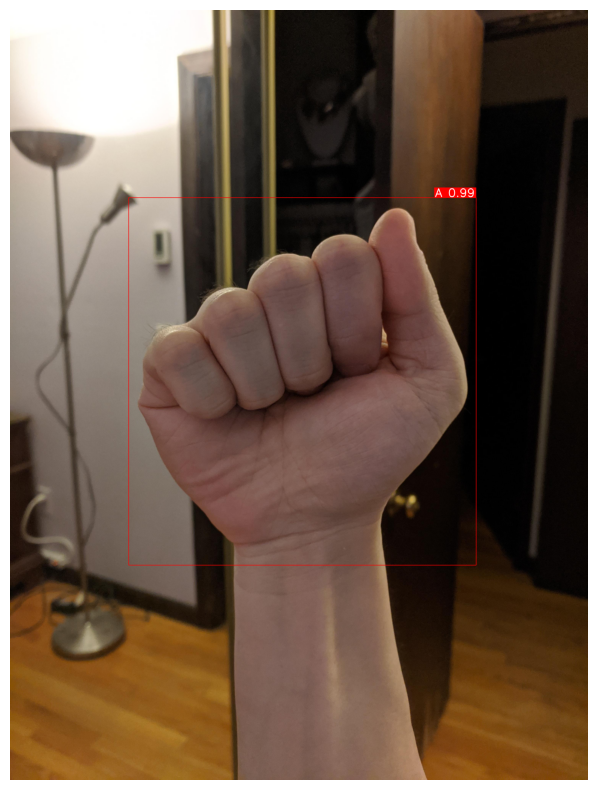

In [8]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load the exported ONNX model
onnx_model = YOLO("/content/drive/MyDrive/Yolo_dataset/runs/detect/train15/weights/best.onnx")
image_path = "/content/drive/MyDrive/Yolo_dataset/test/images/A22_jpg.rf.66ed75c9e281ec8b549997783c4c216d.jpg"
# Run inference
results = onnx_model(image_path)

# Get the bounding boxes and labels
boxes = results[0].boxes  # Get the boxes
labels = results[0].names  # Get the class names

# Load the original image

image = cv2.imread(image_path)

# Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Draw bounding boxes on the image
for box in boxes:
    # Ensure box has all required attributes
    if hasattr(box, 'xyxy') and len(box.xyxy[0]) >= 4:
        x1, y1, x2, y2 = box.xyxy[0][:4]  # Get coordinates
        conf = box.conf[0]  # Get confidence
        cls = int(box.cls[0])  # Get class index
        class_name = labels[cls]  # Get class name

        # Draw rectangle around the detected object
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)  # Blue box

        # Create label with class name and confidence
        label = f"{class_name} {conf:.2f}"  # Example: "A 0.93"

        # Get text size for positioning
        (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 2, 2)  # Increased font scale

        # Draw a filled rectangle behind the label for better visibility
        # Adjust rectangle size to fit the text
        cv2.rectangle(image, (int(x2) - w-10, int(y1) - h-10), (int(x2), int(y1)), (255, 0, 0), -1)

        # Put label on the image at the top-right corner of the box
        cv2.putText(image, label, (int(x2) - w - 5, int(y1) - 5),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    2,  # Font size
                    (255, 255, 255),  # White color for text
                    3)  # Thickness

# Plot the image with bounding boxes and labels
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()
